In [1]:
# Capital Bike Share data

In [6]:
import numpy as np

import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [9]:
train = pd.read_csv('train_bikes.csv', index_col=0, parse_dates=True)
test = pd.read_csv('test_bikes.csv', index_col=0, parse_dates=True)

In [10]:
# Exploratory Data Analysis

In [11]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [12]:
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
datetime,,,,,,,,
2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [13]:
# at first glance, train dataset has two extra columns (casual and registered) which do not exist in test dataset
# in theory, these can be dropped as they cannot be tested in any case 

In [14]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [16]:
test.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


In [17]:
# looks like dataset is complete with no missing values 

In [18]:
# will continue further EDA with train dataset

In [19]:
# first, the correlation plot

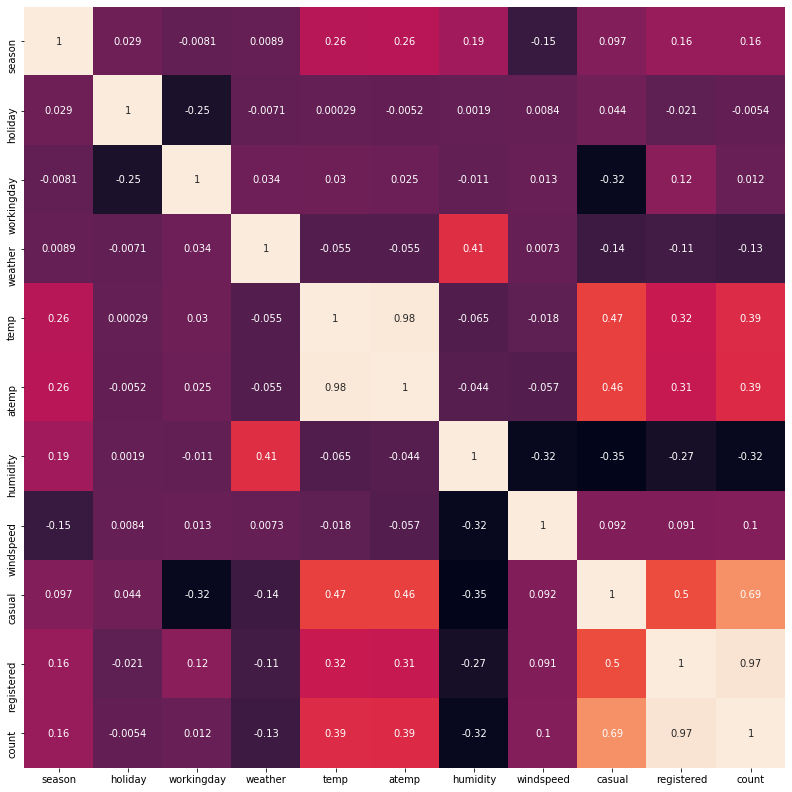

In [21]:
corr_plot = train.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr_plot, square=True, annot=True, cbar=False)

In [22]:
# lots of interesting preliminary observations: 
# 1. count has strong positive correlation with both temp and atemp - bike hiring strongly weather dependant
# 2. but: temp and atemp are themselves strongly colinear - drop one of them
# 3. strong positive correlation with casual - probably more often used by tourists
# 4. weak positive correlation with season and windspeed 
# 5. negative correlation with humidity (& weather)

In [23]:
# DataTimeIndex-ifying

In [24]:
# using index column which has datetime info to create a new column 

train['datetime'] = pd.to_datetime(train.index)

In [27]:
# create new columns for time series data
train['year'] = pd.DatetimeIndex(train['datetime']).year
train['month'] = pd.DatetimeIndex(train['datetime']).month
train['day'] = pd.DatetimeIndex(train['datetime']).day
train['hour'] = pd.DatetimeIndex(train['datetime']).hour

In [29]:
# datetime column not required anymore, drop

train = train.drop(['datetime'], axis=1)

In [30]:
# if for any reason, categorial values are needed, the following commented out code can be used

# df['season'] = df.season.map({1:'jan-mar', 2:'apr-jun', 3:'jul-aug', 4:'oct-dec'})
# df['weather'] = df.weather.map({1:'fabulous', 2:'good', 3:'bad', 4:'terrible'})

In [31]:
# Datatype coercion: many categorical values are stored as integers

train.dtypes

season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
year            int64
month           int64
day             int64
hour            int64
dtype: object

In [33]:
# coercing these into categorical datatypes

cat_var_list = ['season', 'holiday', 'workingday', 'year', 'month', 'day', 'hour']

for var in cat_var_list:
    train[var] = train[var].astype('category')

In [34]:
train.dtypes

season        category
holiday       category
workingday    category
weather          int64
temp           float64
atemp          float64
humidity         int64
windspeed      float64
casual           int64
registered       int64
count            int64
year          category
month         category
day           category
hour          category
dtype: object

In [35]:
# drop columns as discussed above
train = train.drop(['atemp'], axis=1)
train = train.drop(['casual'], axis=1)
train = train.drop(['registered'], axis=1)

In [37]:
train.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,count,year,month,day,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0,16,2011,1,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0,40,2011,1,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0,32,2011,1,1,2
2011-01-01 03:00:00,1,0,0,1,9.84,75,0.0,13,2011,1,1,3
2011-01-01 04:00:00,1,0,0,1,9.84,75,0.0,1,2011,1,1,4


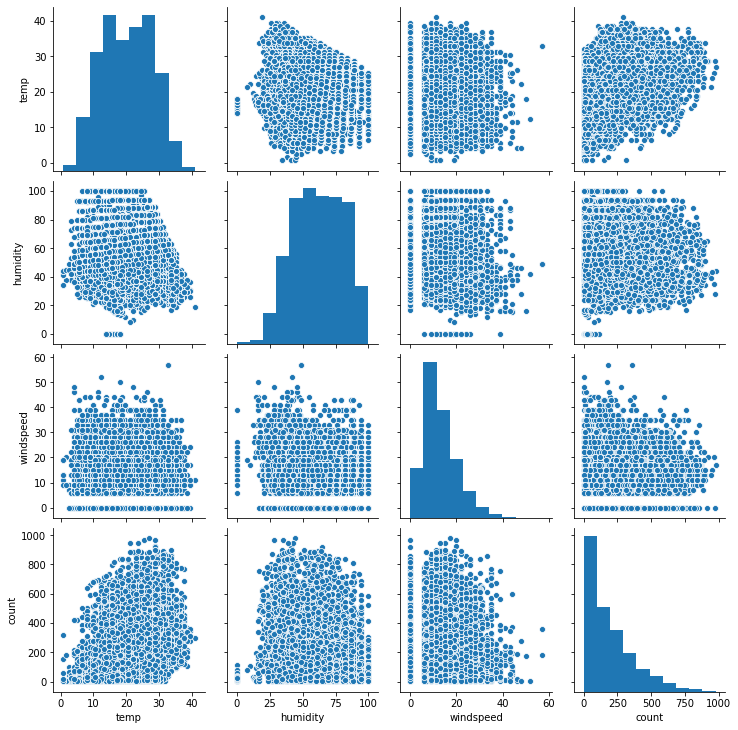

In [39]:
# Pairplots

sns.pairplot(train, vars=['temp', 'humidity', 'windspeed', 'count'])

In [41]:
# nothing immediately obvious to the eye
# temp and count have a positive-ish correlation
# data not always normally distributed

In [42]:
# Data Distribution, Outlier Elimination

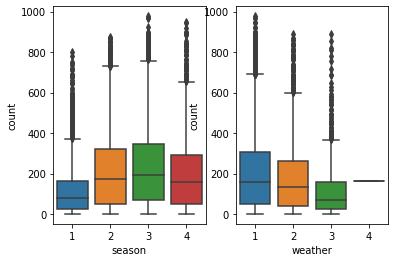

In [45]:
# Variation across seasons
# very few samples for weather cat 4??

f, axes = plt.subplots(1, 2)
sns.boxplot(data=train, x='season', y='count', ax=axes[0])
sns.boxplot(data=train, x='weather', y='count', ax=axes[1])

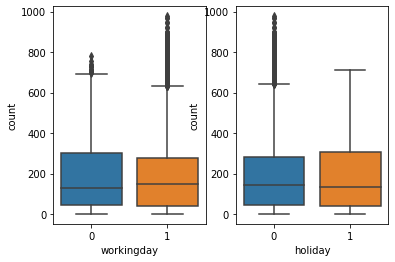

In [46]:
# Variation across working days/holiday

f, axes = plt.subplots(1, 2)
sns.boxplot(data=train, x='workingday', y='count', ax=axes[0])
sns.boxplot(data=train, x='holiday', y='count', ax=axes[1])

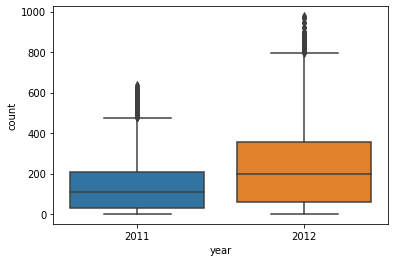

In [47]:
# Variation across years in dataset

sns.boxplot(data=train, x='year', y='count')

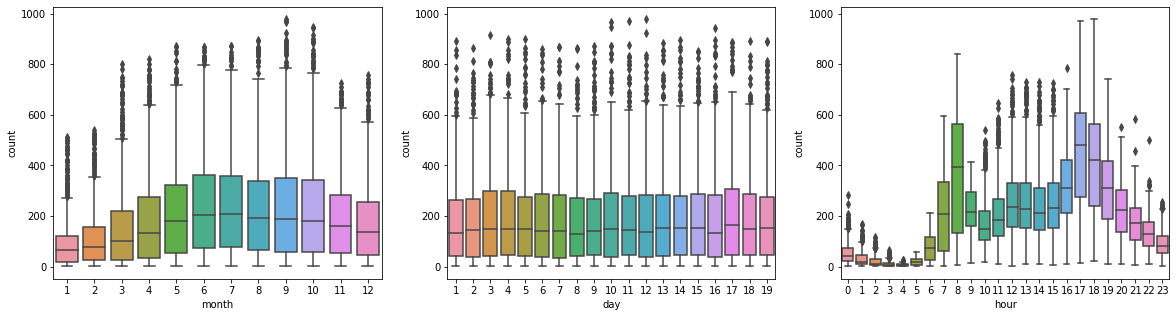

In [48]:
# Variation across time scales

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
fig.set_size_inches(20, 5)
sns.boxplot(data=train, x='month', y='count', ax=ax1)
sns.boxplot(data=train, x='day', y='count', ax=ax2)
sns.boxplot(data=train, x='hour', y='count', ax=ax3)

In [49]:
# several outliers all around, rather noticeably in the non-office hours
# removing those that lie 3 or more standard deviations away from the mean 

train = train[np.abs(train['count'] - train['count'].mean()) <= (3 * train['count'].std())]

In [52]:
# How do bike rentals vary across time scales?

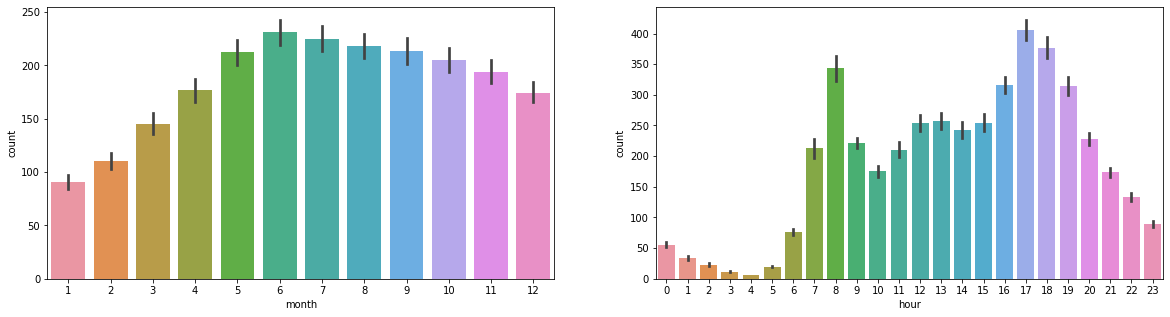

In [59]:
# clear reduction in use during peak winter/early spring months (especially Jan-Apr)
# no obvious effect across the 19 days of the month, this plot commented out
# very clear upticks during morning and evening rush/office hours 

fig, (ax1, ax3) = plt.subplots(ncols=2)
fig.set_size_inches(20, 5)
sns.barplot(data=train, x='month', y='count', ax=ax1)
#sns.barplot(data=train, x='day', y='count', ax=ax2)
sns.barplot(data=train, x='hour', y='count', ax=ax3)

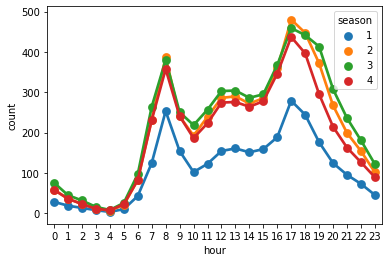

In [60]:
# how does avg count vary across time of day during different seasons

pooled_hour = pd.DataFrame(train.groupby(['hour', 'season'], sort=True)['count'].mean()).reset_index()
sns.pointplot(x=pooled_hour['hour'], y=pooled_hour['count'], hue=pooled_hour['season'], data=pooled_hour, join=True)

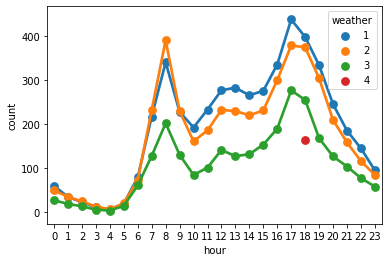

In [61]:
# how does avg count vary across time of day during different weather categorisations?
# counts for 'terrible' weather (4) seem odd - guess it happened only once and ~180 bikes were hired then

pooled_hour = pd.DataFrame(train.groupby(['hour', 'weather'], sort=True)['count'].mean()).reset_index()
sns.pointplot(x=pooled_hour['hour'], y=pooled_hour['count'], hue=pooled_hour['weather'], data=pooled_hour, join=True)

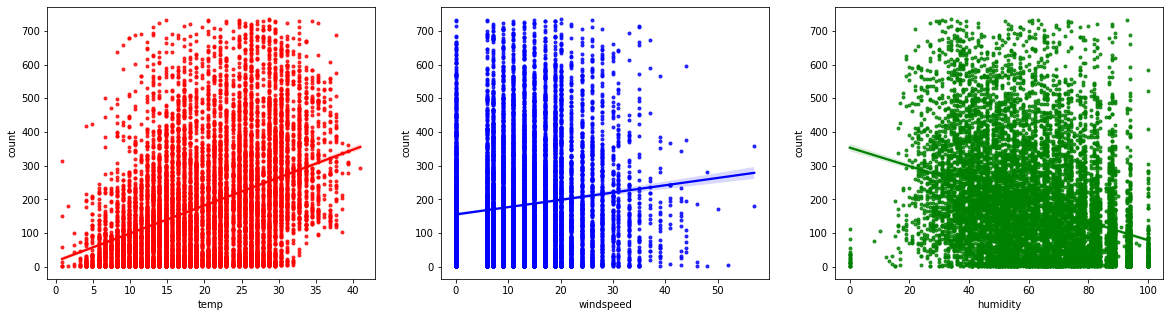

In [68]:
# How do bike rentals vary across various weather conditions?
# positive correlations with temp & windspeed, and negative correlation with humidity as observed before

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
fig.set_size_inches(20, 5)
sns.regplot(x='temp', y='count', data=train, ax=ax1, marker='.', color='red')
sns.regplot(x='windspeed', y='count', data=train, ax=ax2, marker='.', color='blue')
sns.regplot(x='humidity', y='count', data=train, ax=ax3, marker='.', color='green');